In [173]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='Open Sans')

In [188]:
corr_files = ['data/brands/likes/{}/'.format('idf30') + x for x in os.listdir('data/brands/likes/{}'.format('idf30')) if x.endswith('.csv') and x.startswith('unlabel')]
corr_filenames = [x[x.find('/')+46: x.find('.csv')] for x in corr_files]


In [189]:
corr_filenames

['volkswagenpolska',
 'lexuspolska',
 'jaguarpolska',
 'toyotapolska',
 'mercedesbenzpolska',
 'hondapolska',
 'fiatpl',
 'chevroletpl',
 'skodapolska',
 'ford.polska',
 'opelklub',
 'porschepl',
 'renaultpolska',
 'jeeppl',
 'hyundaipolska',
 'seatpolska',
 'bmw.polska',
 'citroenpolska',
 'landroverpolska',
 'ferrarikatowice',
 'peugeotpolska',
 'audipl',
 'kiamotorspolska']

In [195]:
def return_data(success = 'weighted', method = 'idf'):
    if method == 'idf':
        add_likes = 44
        add_success = 38
    else:
        add_likes = 46
        add_success = 40
    if success == 'likes':
        corr_files = ['data/brands/likes/{}/'.format(method) + x for x in os.listdir('data/brands/likes/{}'.format(method)) if x.endswith('.csv') and x.startswith('unlabel')]
        corr_filenames = [x[x.find('/')+add_likes: x.find('.csv')] for x in corr_files]
    else:
        corr_files = ['data/brands/{}/'.format(method) + x for x in os.listdir('data/brands/likes/{}'.format(method)) if x.endswith('.csv') and x.startswith('unlabel')]
        corr_filenames = [x[x.find('/')+add_success: x.find('.csv')] for x in corr_files]
    corr_images = ['logo/' + x + '.png' for x in corr_filenames]
    
    col = pd.DataFrame()
    for i in range(len(corr_files)):
        x = pd.read_csv(corr_files[i], index_col='Unnamed: 0')
        xxx = pd.DataFrame(x['success']).T.reset_index()
        xxx.index = [corr_filenames[i]]
        xxx = xxx.iloc[:, 2:]
        col = pd.concat([col, xxx], axis=0)
    col.columns = [get_label(vv) for vv in col.columns]
    return col

In [207]:
#https://stackoverflow.com/questions/17990845/how-to-equalize-the-scales-of-x-axis-and-y-axis-in-python-matplotlib
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [112]:
def get_label(string):
    """
        Convert feature names to 'more X association' labels
    """
#     return 'more {} associations'.format(string[5+string[4:].find('_'):])
    if string != 'success':
        return string[6 + string[5:].find('_'):]
    else:
        return string

In [117]:
plt.axhline?

In [135]:
col['white_collar'].max()

0.05725164381737325

In [237]:
def plot_words_map(col, word1, word2):
    plt.figure(figsize=(40,40))
    # plt.scatter(col['beautiful'], col['innovative'])
    plt.axhline(linewidth=4, color='k')
    plt.axvline(linewidth=4, color='k')
#     val = min(max(col[word1].max(), col[word2].max(), -col[word2].min(), -col[word1].min()) + 0.03, 0.2)
    val = 0.16
    for i in range(len(col.index)):
        #plt.annotate(col.index[i], (col['beautiful'].iloc[i], col['innovative'].iloc[i]))
        imscatter(col[word1].iloc[i], col[word2].iloc[i], corr_images[i], ax=None, zoom=1)
    plt.xlim(-val, val)
    plt.ylim(-val, val)
    plt.title('Correlation with Post Success', size=60, y=1.02)
    plt.gca().tick_params(axis='x', length=15, which='major', pad=5)
    plt.gca().tick_params(axis='y', length=15, which='major', pad=5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks(size=40)
    plt.yticks(size=40)
    plt.xlabel(re.sub('_', ' ', '{} association strength'.format(word1)), size=50, labelpad=10)
    plt.ylabel(re.sub('_', ' ', '{} association strength'.format(word2)), size=50, labelpad=10)


In [238]:
def save_wordmap(word1, word2, success = 'weighted', method = 'idf'):
    col = return_data(success, method)
    plot_words_map(col, word1, word2)
    if success == 'weighted':
        plt.savefig('fig/brands/{}/wordmap/{}_{}.png'.format(method, word1, word2), bbox_inches='tight', transparent=True)
    else:
        plt.savefig('fig/brands/likes/{}/wordmap/{}_{}.png'.format(method, word1, word2), bbox_inches='tight', transparent=True)        

In [242]:
print(list(col.columns))

['above', 'african_names', 'african_names_2004', 'aktiv', 'alive', 'altmodisch', 'arts', 'arts_2', 'bad', 'basic', 'beautiful', 'below', 'big', 'blue_collar', 'blunt', 'career', 'cheap', 'children', 'closed', 'community', 'cool', 'cruel', 'culture', 'dead', 'descriptive', 'design', 'destructive', 'innovative', 'responsible', 'TheRebel', 'appetitlich', 'electric', 'emotionally_stable', 'ernst', 'european_names', 'evaluating', 'expensive', 'extraverted', 'extrovert', 'extroverted', 'family', 'fascination', 'female', 'friendship', 'functionality', 'healthy_positive', 'healthy_restrictive', 'impractical', 'inaktiv', 'winner', 'indulgent', 'cold', 'innovative_rachel', 'inside', 'introverted', 'kind', 'kompliziert', 'lazy', 'lifestyle', 'lustig', 'male', 'math', 'modern', 'modern_2', 'music', 'musical_instrument', 'nachhaltig', 'natürlich', 'neurotic', 'new', 'diligent', 'outside', 'performance', 'pleasant', 'bargain', 'polite', 'power', 'practical', 'protective', 'sympathisch', 'safety', 's

In [251]:
col

above  african_names  african_names_2004     aktiv  \
volkswagenpolska   -0.042272       0.046705            0.018168  0.042221   
lexuspolska         0.038887      -0.004751           -0.066204  0.055292   
jaguarpolska        0.082238      -0.133727           -0.154448  0.123521   
toyotapolska        0.066776       0.023406           -0.011605 -0.074982   
mercedesbenzpolska -0.245266       0.273545            0.145144 -0.275180   
hondapolska         0.020354      -0.069788           -0.107515  0.041937   
fiatpl              0.021592      -0.022099           -0.016160  0.094624   
chevroletpl         0.112404       0.025528           -0.269271 -0.090398   
skodapolska        -0.009634       0.063741            0.063347  0.039049   
ford.polska         0.004942       0.010387           -0.013345 -0.013047   
opelklub           -0.019159       0.026432            0.100349  0.018111   
porschepl          -0.060416       0.023579           -0.067529 -0.105975   
renaultpolska      -0.023599       0.006219            0.011466  0.003932   
jeeppl              0.043475      -0.040676           -0.042360  0.030185   
hyundaipolska      -0.066336       0.002580           -0.058247  0.048490   
seatpolska         -0.028111      -0.036404           -0.079775  0.032614   
bmw.polska         -0.094270       0.150796            0.108504 -0.148517   
citroenpolska      -0.010651       0.014035           -0.027893 -0.050727   
landroverpolska    -0.038903       0.007001           -0.040982 -0.072271   
ferrarikatowice    -0.063246       0.015680           -0.044391 -0.115708   
peugeotpolska       0.035530      -0.024359           -0.012585 -0.009636   
audipl              0.064618      -0.007290           -0.046362  0.039554   
kiamotorspolska     0.020534       0.032674            0.045508 -0.005811   

                       alive  altmodisch      arts    arts_2       bad  \
volkswagenpolska    0.019825    0.037317  0.030470  0.030470 -0.034448   
lexuspolska         0.075502    0.090111  0.065997  0.065997  0.064512   
jaguarpolska        0.169262   -0.049682 -0.016564 -0.016564  0.027970   
toyotapolska       -0.028430    0.028163 -0.034600 -0.034600  0.040335   
mercedesbenzpolska -0.288306    0.181267 -0.111915 -0.111915 -0.184383   
hondapolska         0.077185   -0.014644 -0.119410 -0.119410 -0.016431   
fiatpl              0.120384    0.040948  0.055589  0.055589 -0.011321   
chevroletpl         0.020326    0.102866  0.034519  0.034519 -0.100824   
skodapolska         0.057984    0.094414  0.009447  0.009447  0.030685   
ford.polska        -0.026996    0.040160  0.016982  0.016982  0.012150   
opelklub            0.021861    0.046084  0.079052  0.079052  0.077847   
porschepl          -0.058882    0.108462 -0.063808 -0.063808 -0.039367   
renaultpolska       0.010631    0.004421 -0.015448 -0.015448 -0.031220   
jeeppl              0.071675   -0.007303 -0.021185 -0.021185 -0.031858   
hyundaipolska       0.076474    0.001903 -0.058946 -0.058946 -0.042240   
seatpolska          0.037106   -0.019167 -0.095743 -0.095743 -0.044491   
bmw.polska         -0.127805    0.110389 -0.030962 -0.030962 -0.065810   
citroenpolska      -0.036157    0.016080 -0.029381 -0.029381 -0.002594   
landroverpolska    -0.043233   -0.015591 -0.133128 -0.133128 -0.039376   
ferrarikatowice    -0.046948    0.101029 -0.103265 -0.103265 -0.115148   
peugeotpolska       0.034948    0.039053  0.014407  0.014407 -0.002553   
audipl              0.090474    0.061804 -0.081011 -0.081011  0.054542   
kiamotorspolska    -0.007956   -0.056703  0.025447  0.025447  0.010159   

                       basic     ...      untrustworthy  unwirksam  valuable  \
volkswagenpolska   -0.021467     ...          -0.052731  -0.060834 -0.034777   
lexuspolska         0.079034     ...           0.051975   0.030596  0.042252   
jaguarpolska        0.003136     ...           0.061748   0.097724  0.186170   
toyotapolska        0.067454     ...           0.065914   0.027236 -0.008208 

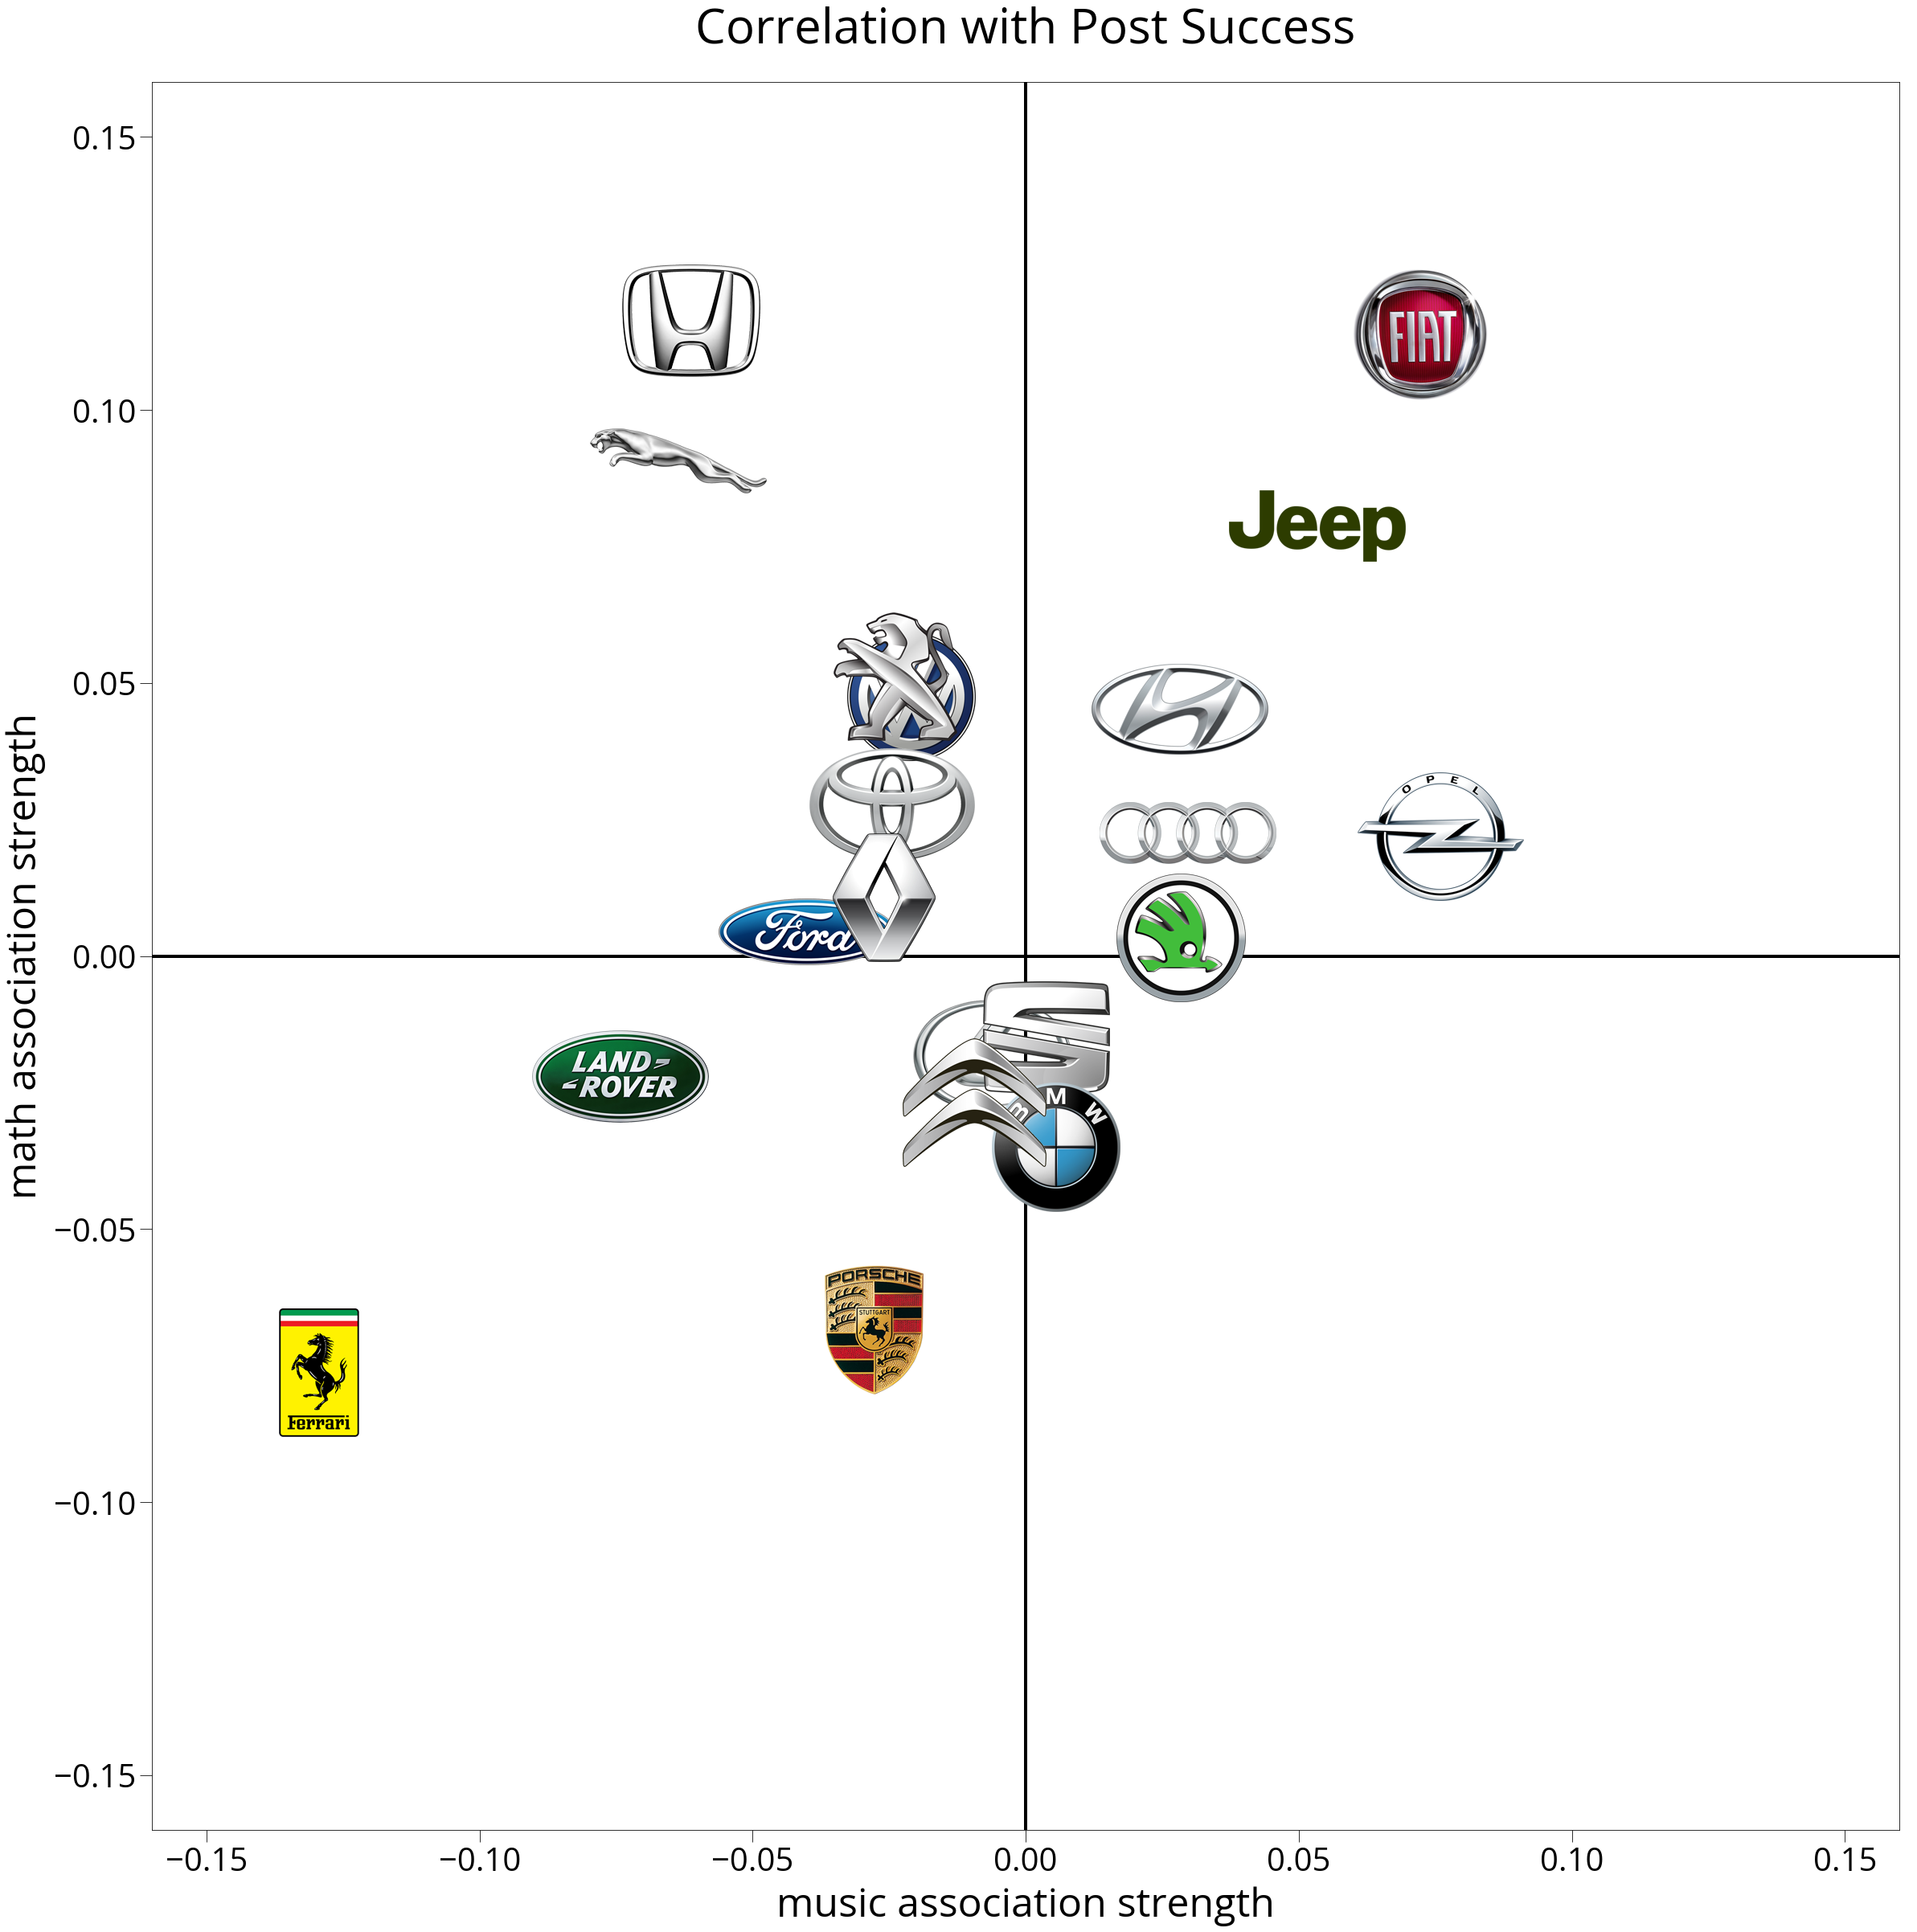

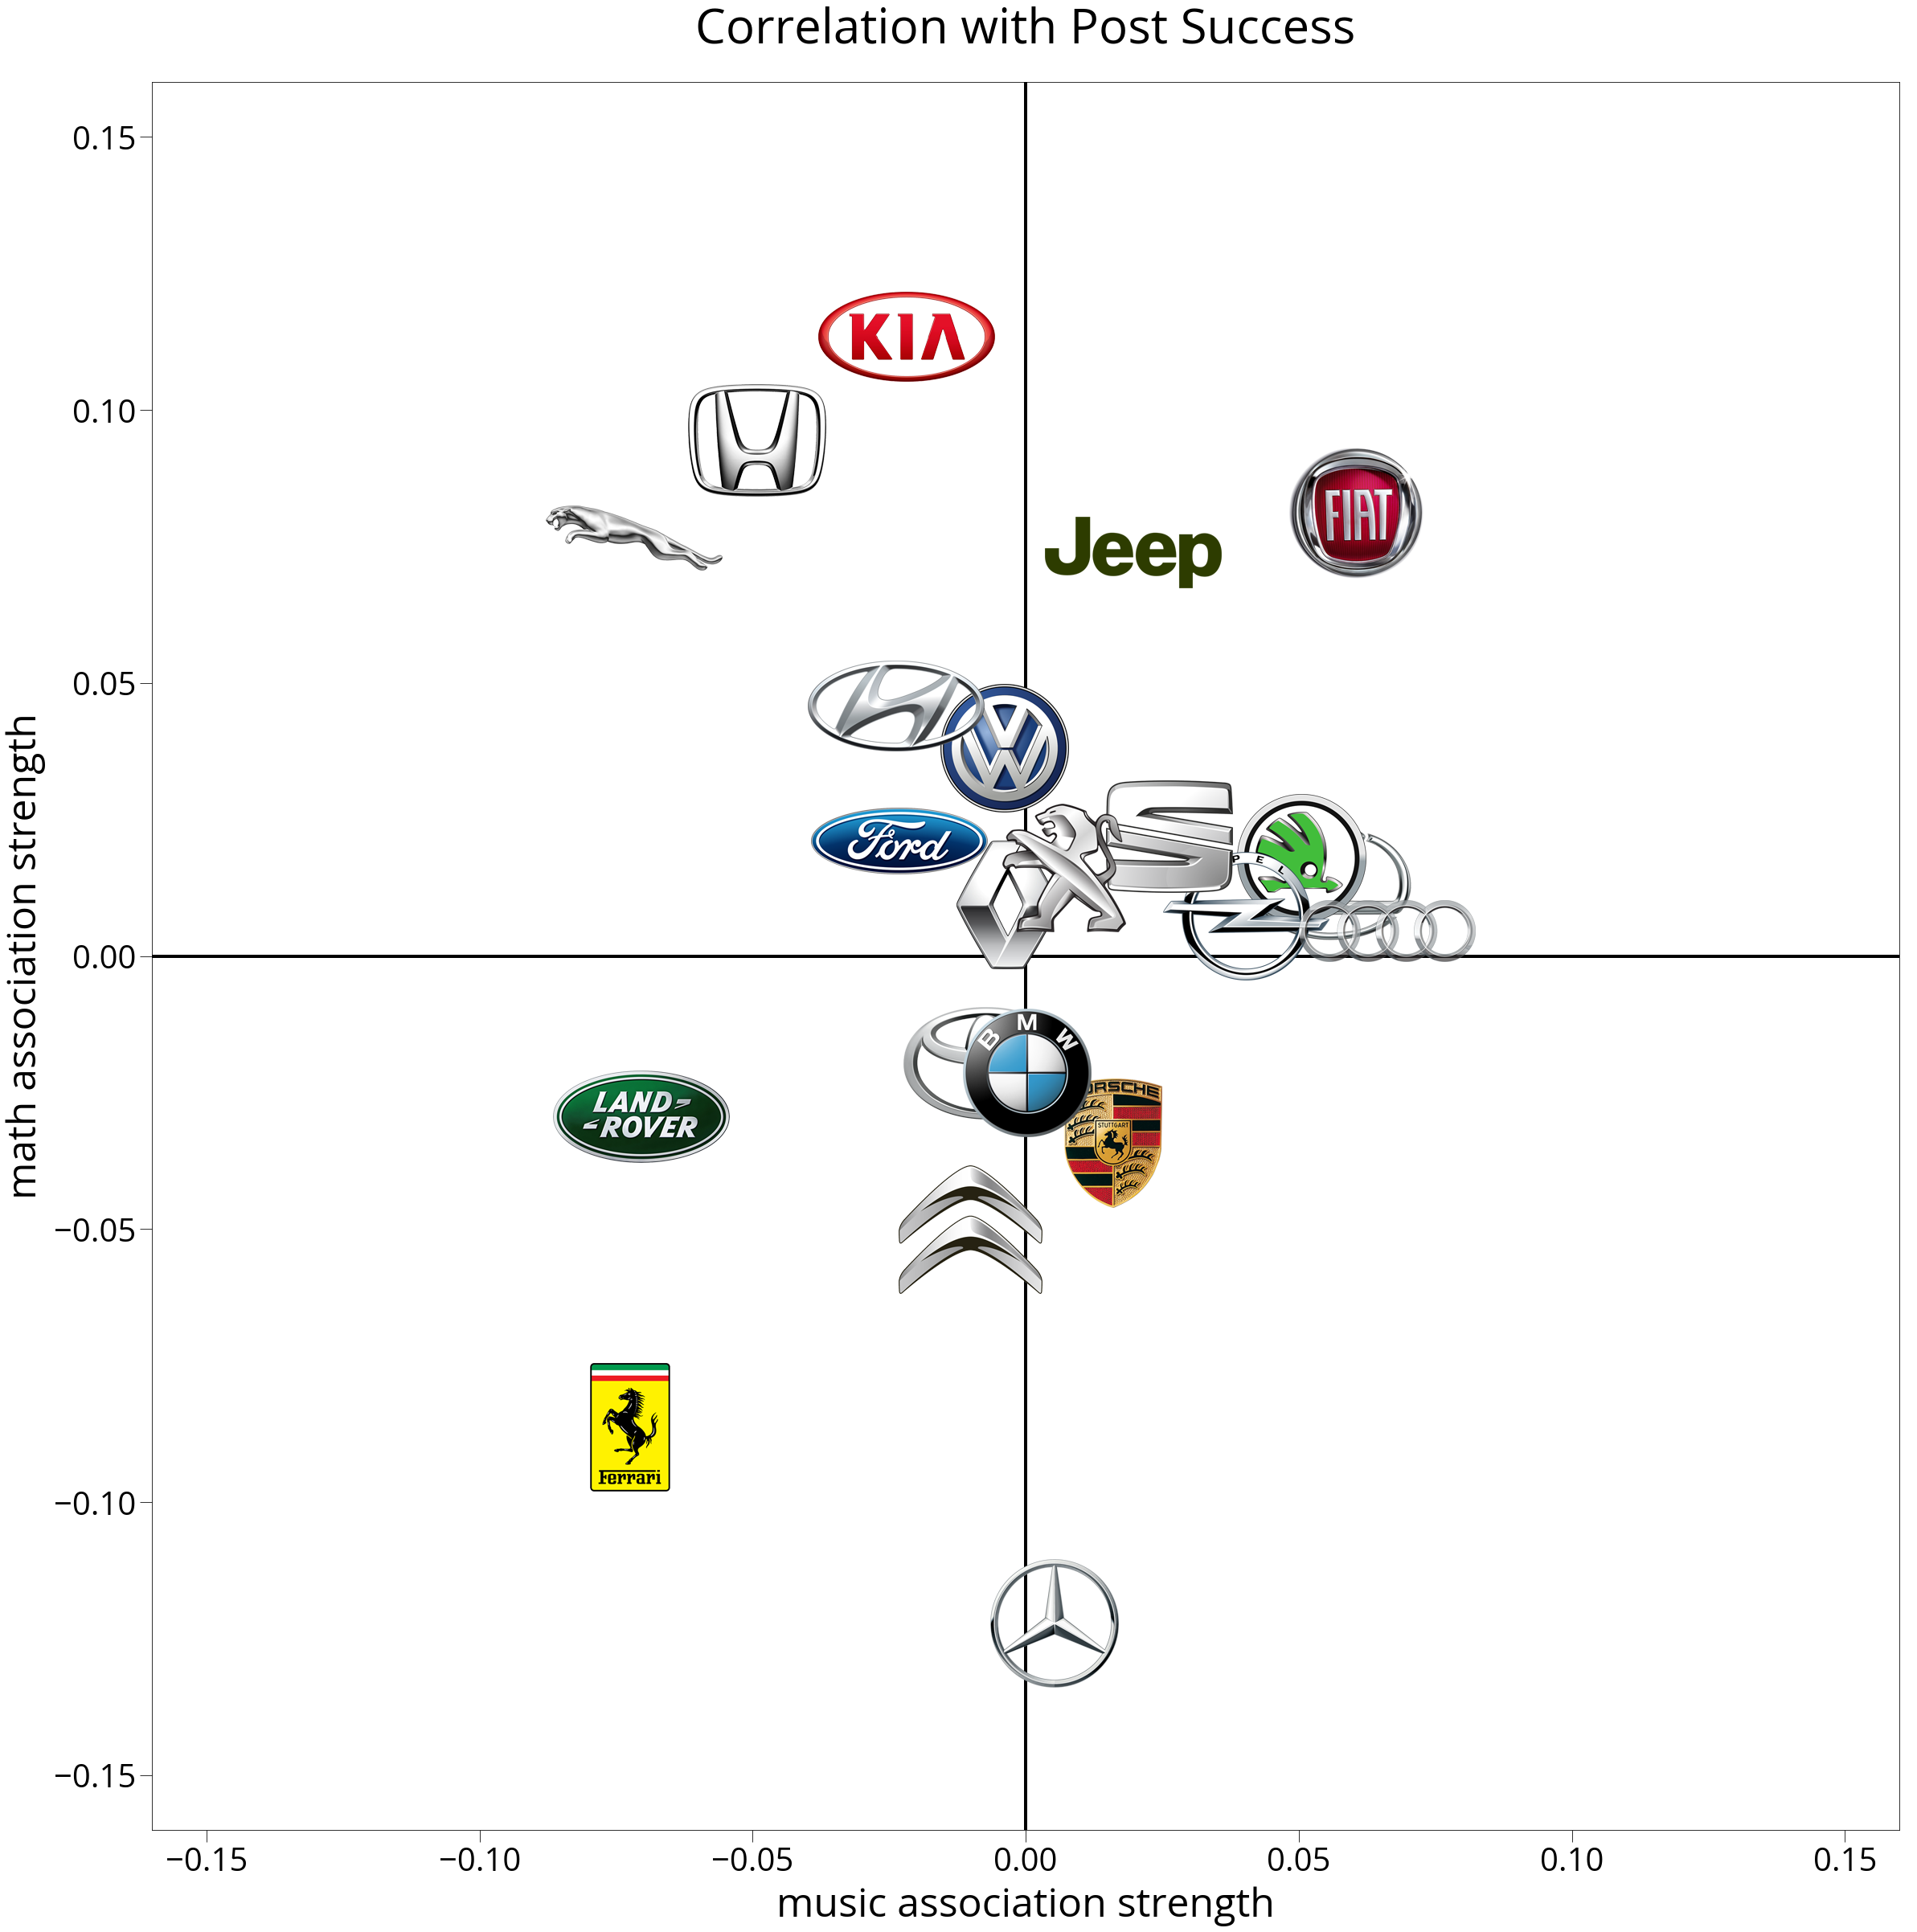

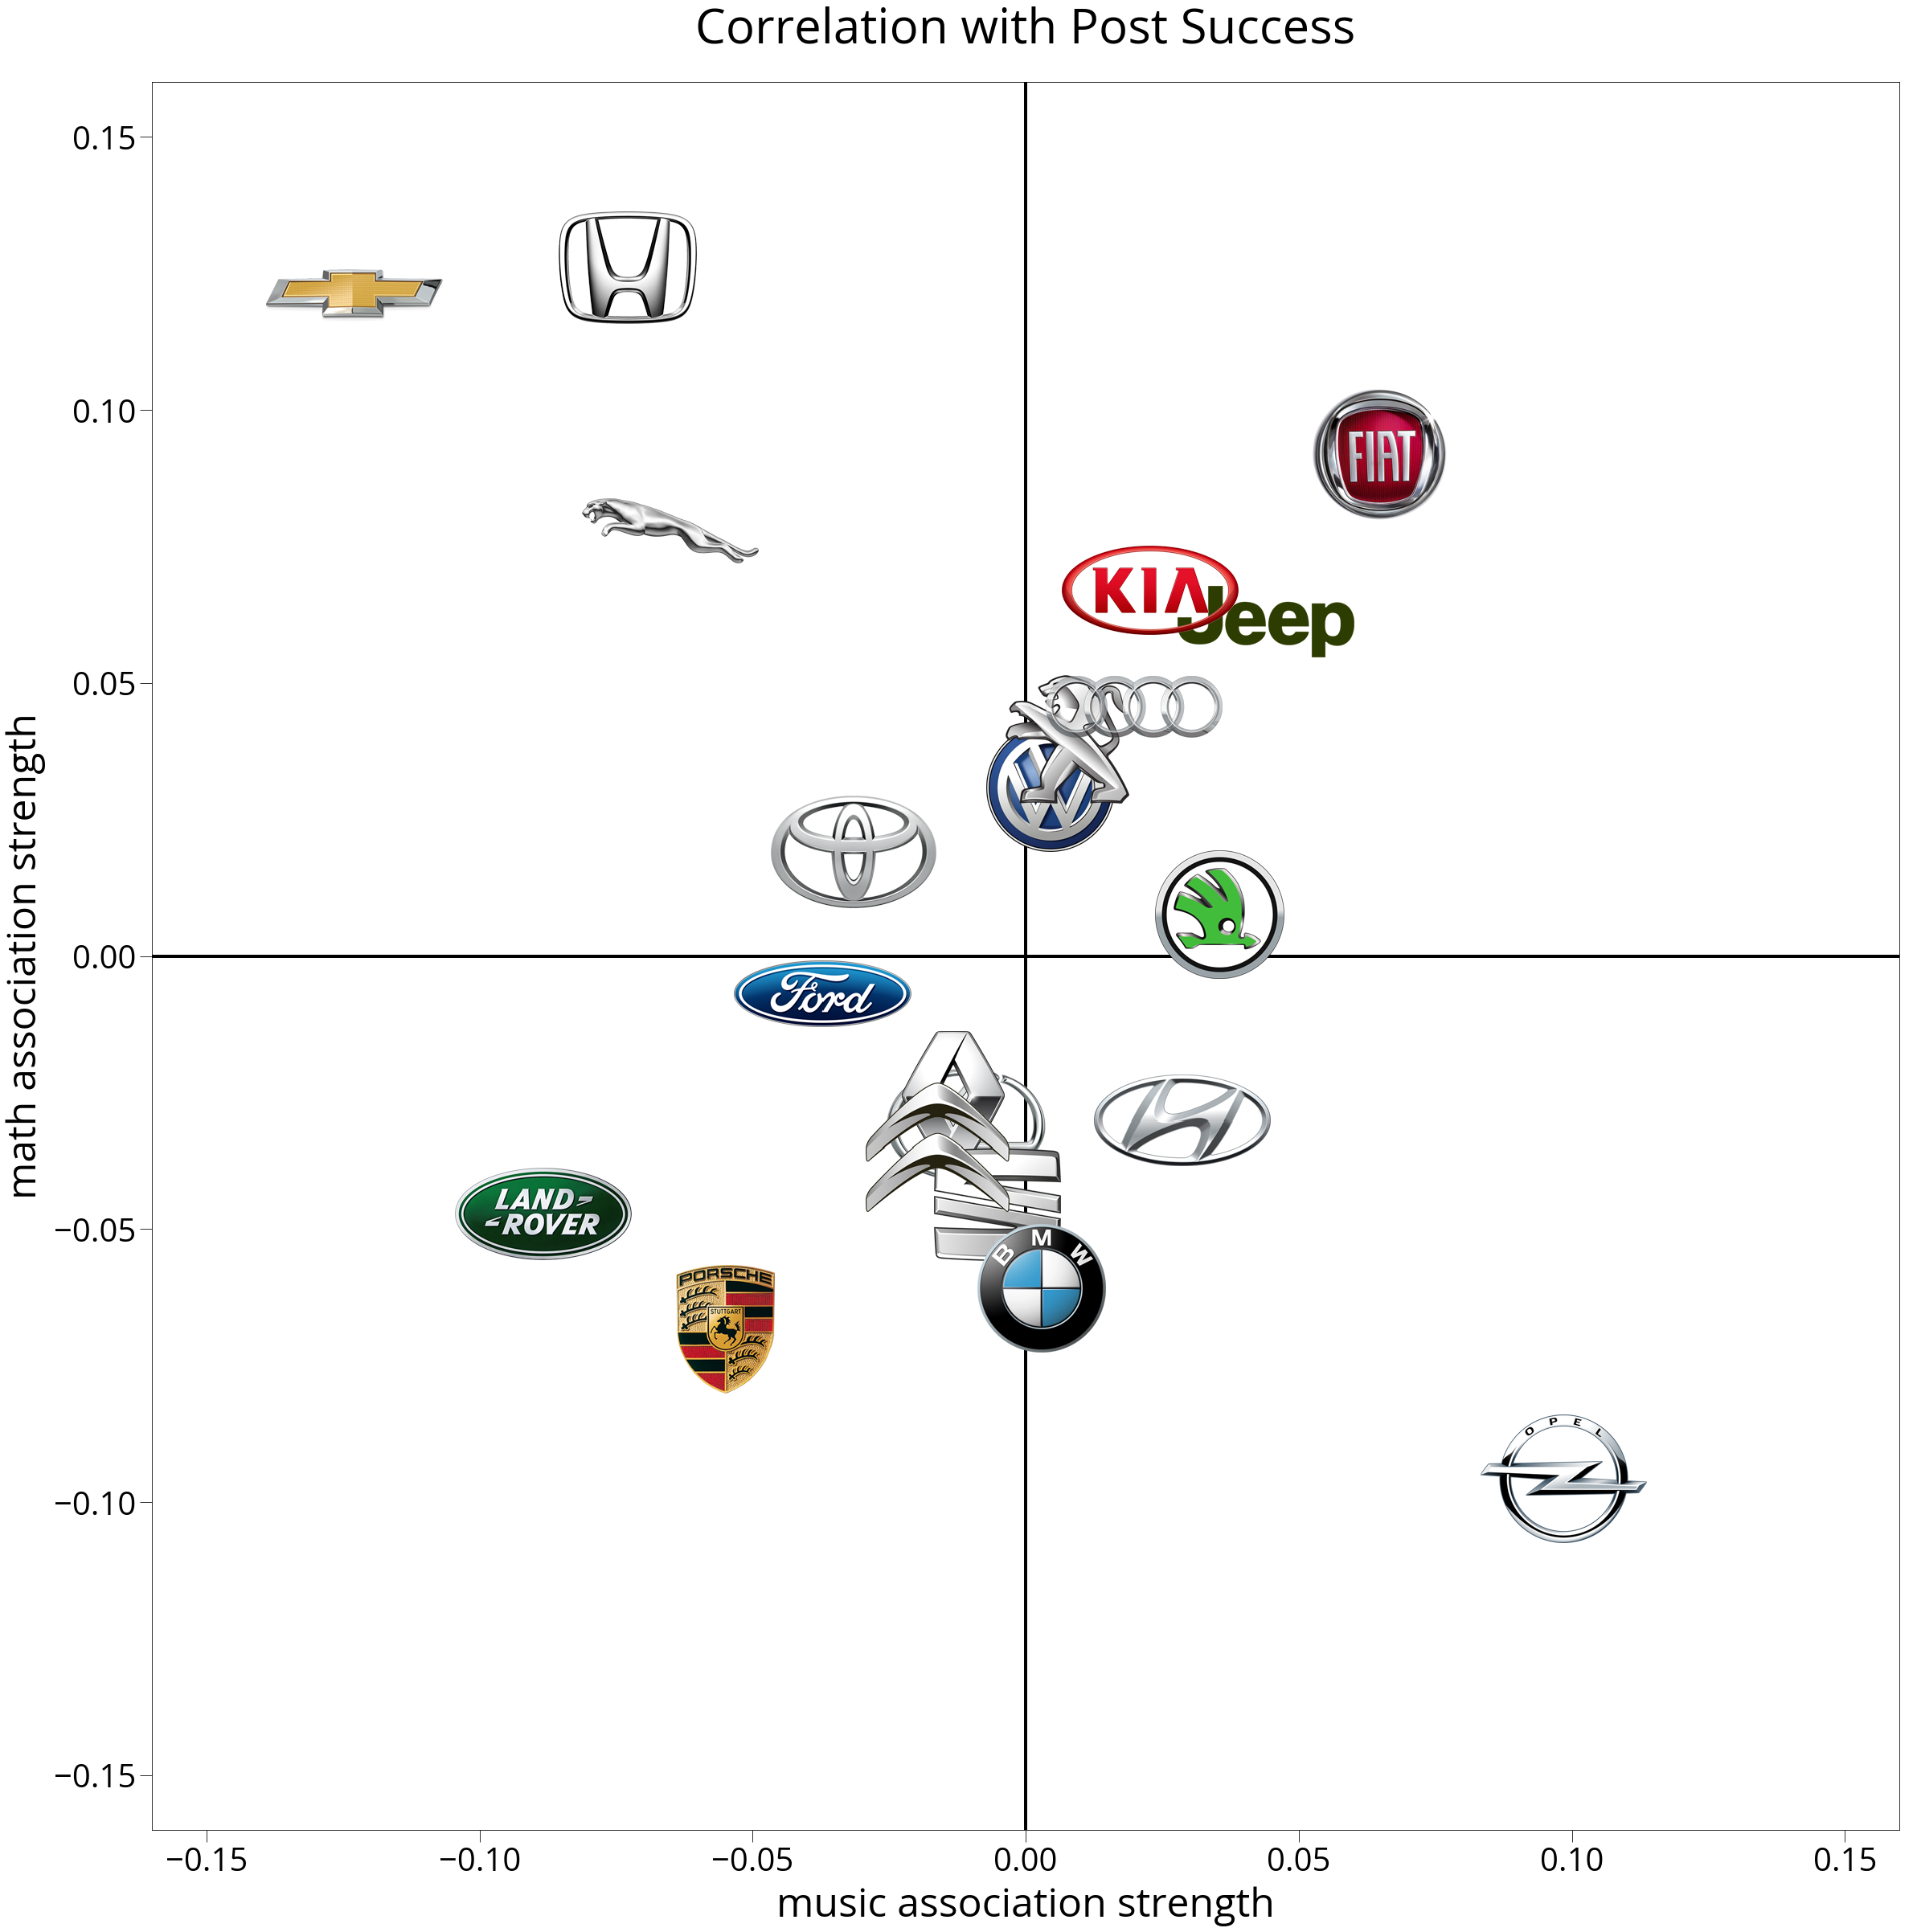

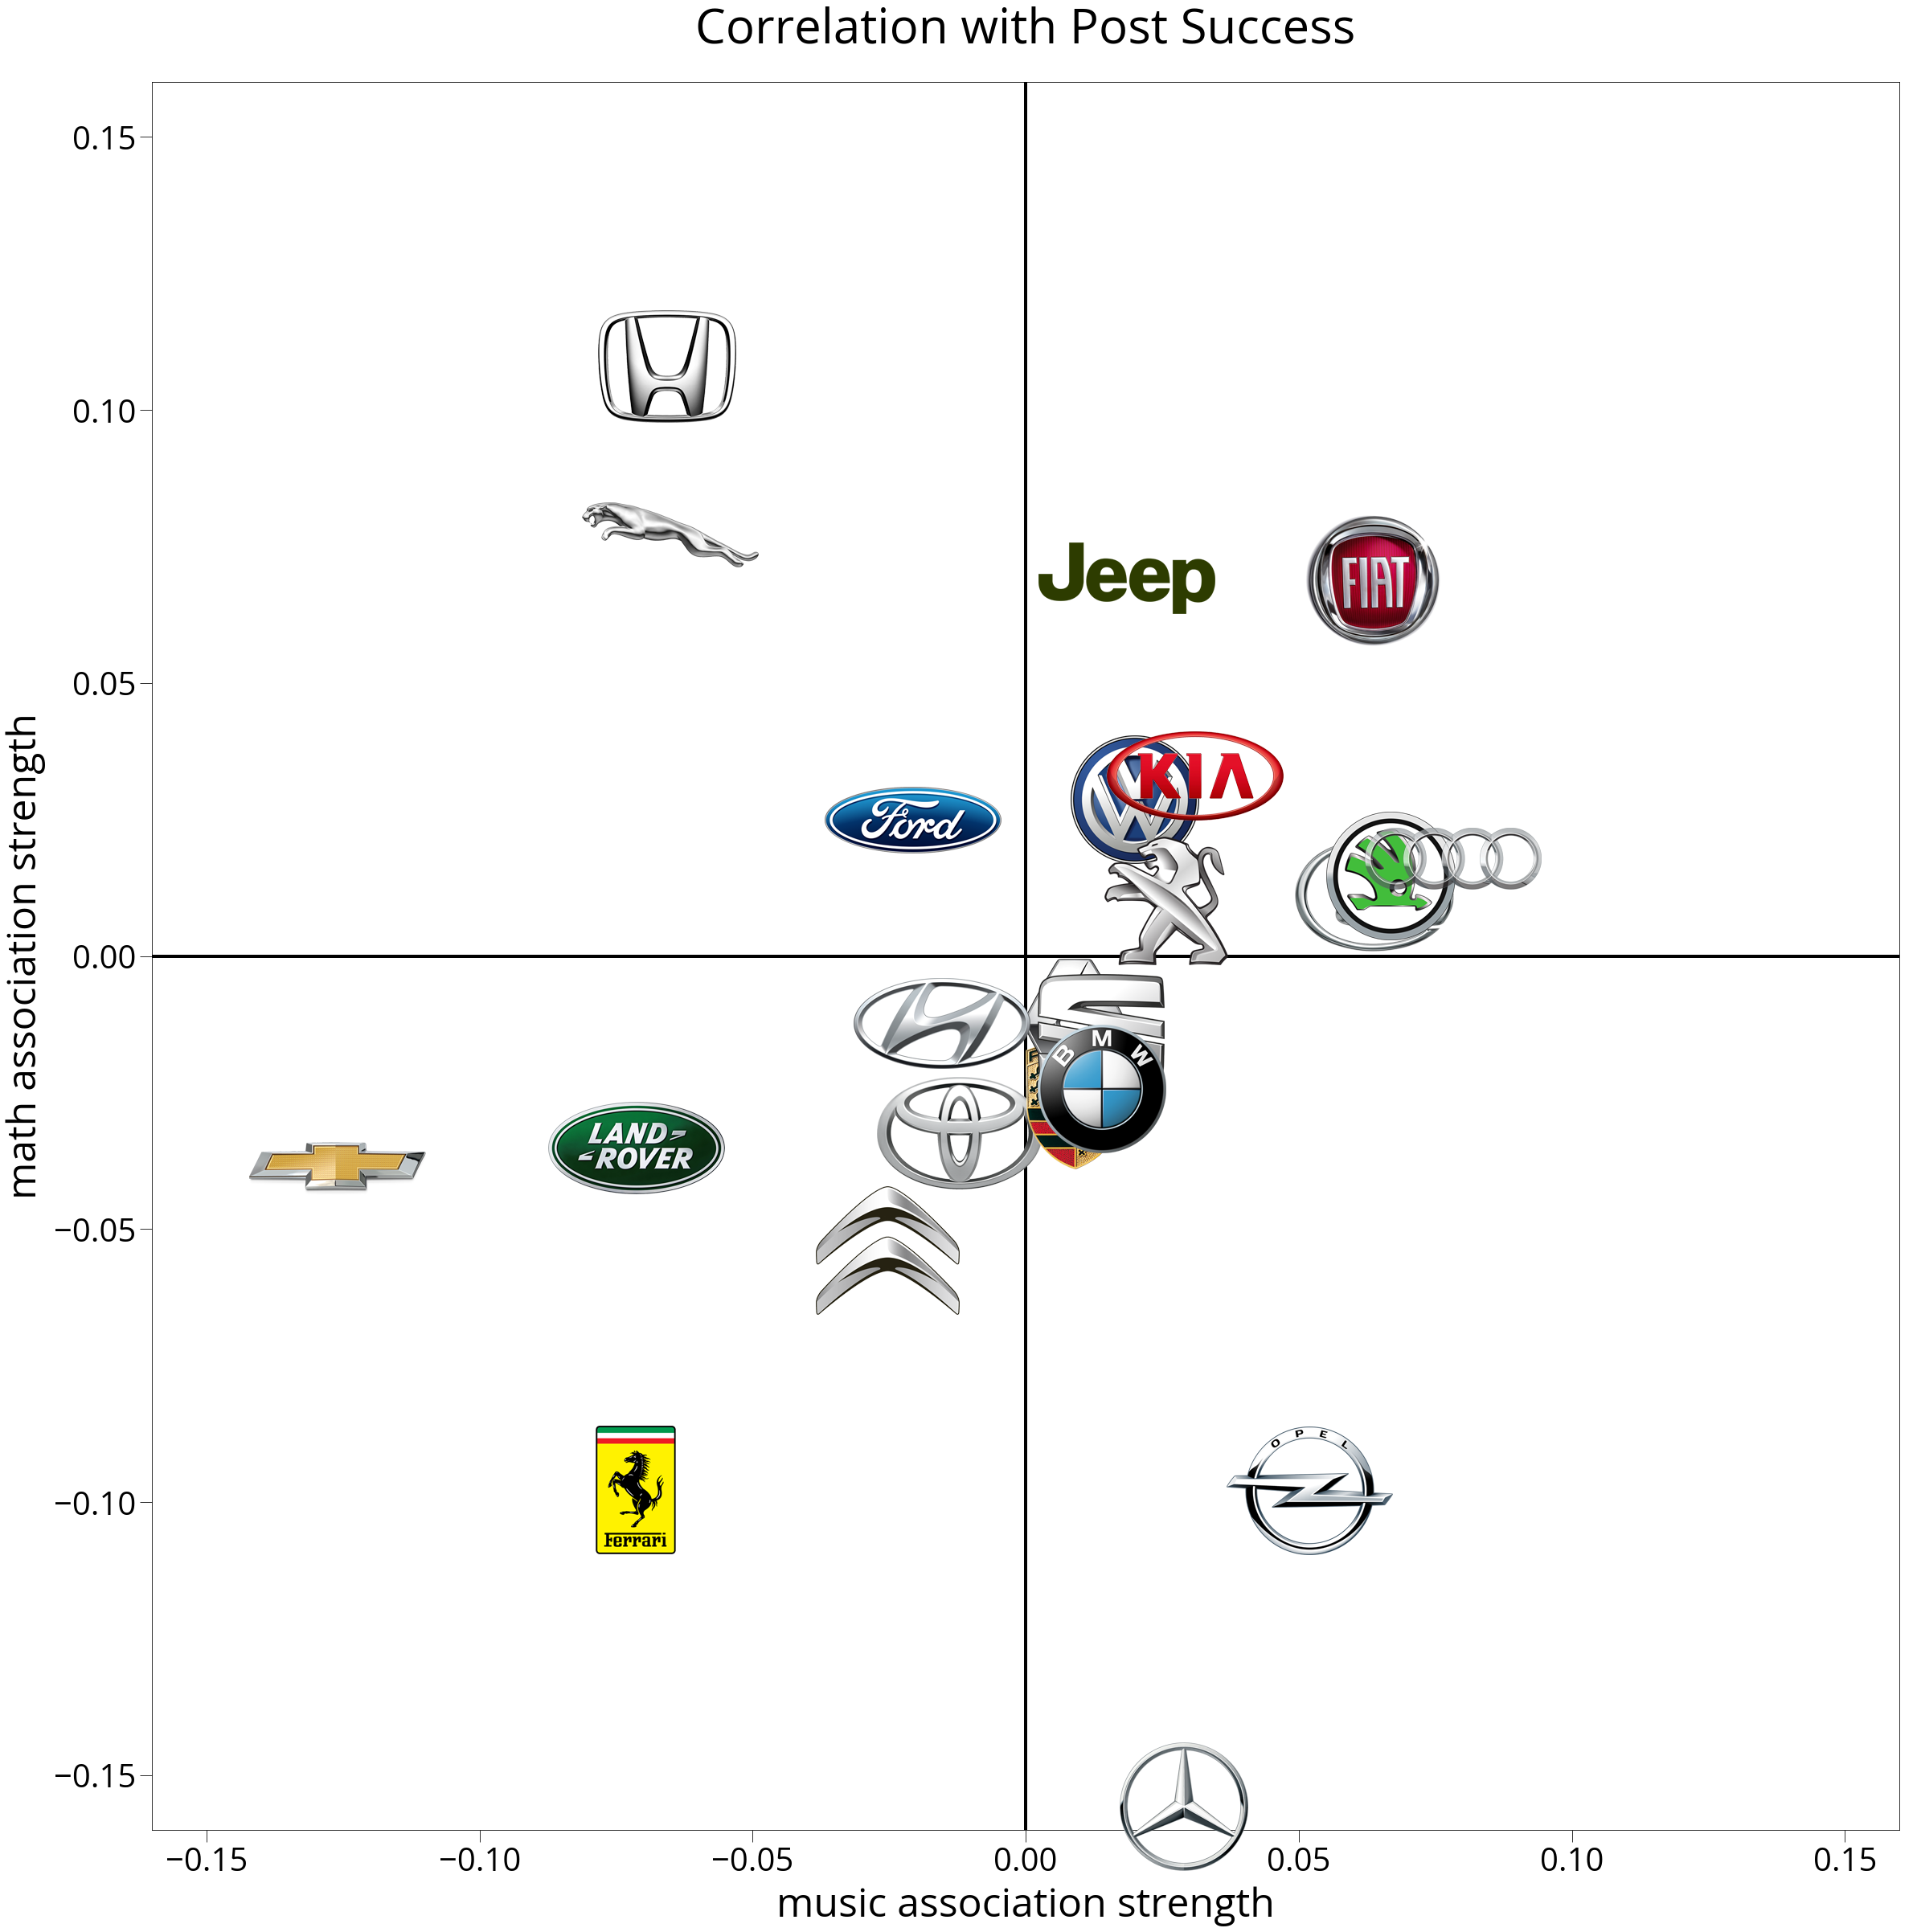

In [250]:
for success in ['weighted', 'likes']:
    for method in ['idf', 'idf30']:
#         save_wordmap('bargain', 'innovative', success, method)
#         save_wordmap('white_collar', 'blue_collar', success, method)
#         save_wordmap('responsible', 'performance', success, method)
#         save_wordmap('bargain', 'cheap', success, method)
#         save_wordmap('trustworthy', 'untrustworthy', success, method)
#         save_wordmap('trustworthy', 'attractive', success, method)
#         save_wordmap('culture', 'science', success, method)
#         save_wordmap('arts', 'science', success, method)
        save_wordmap('music', 'math', success, method)

In [203]:
col = return_data('likes', 'idf')

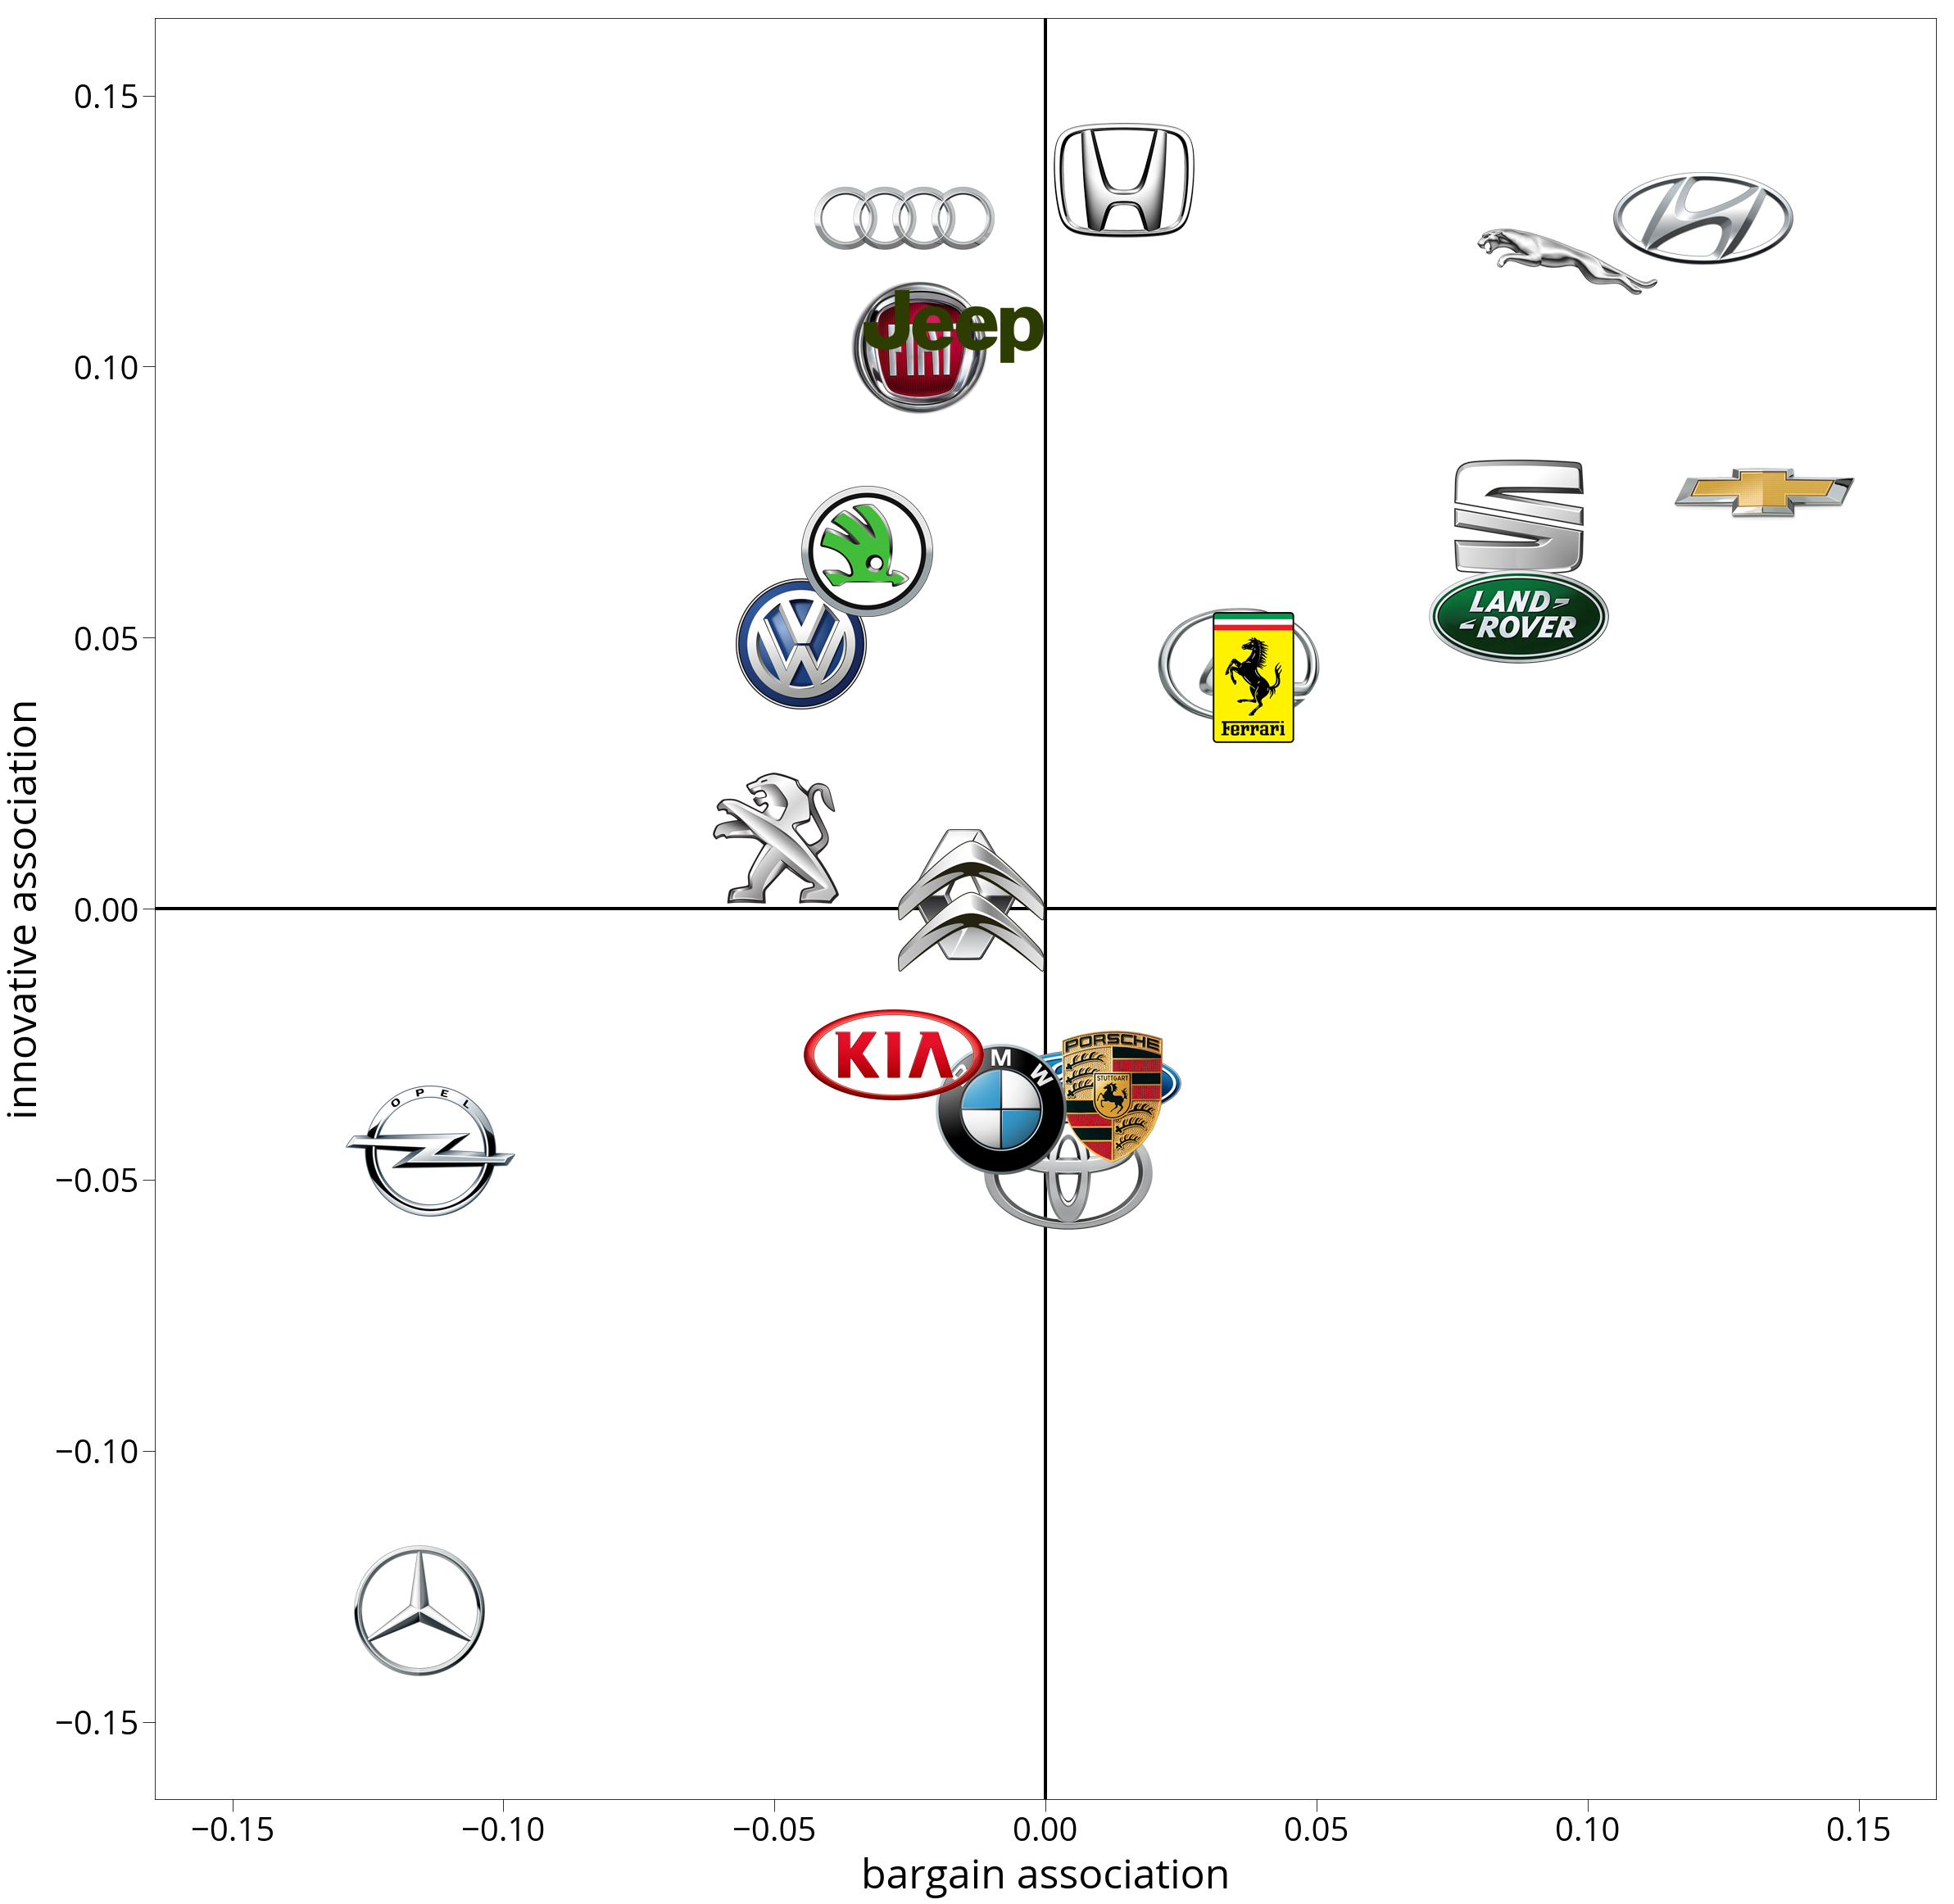

In [205]:
plot_words_map(col, 'bargain', 'innovative')

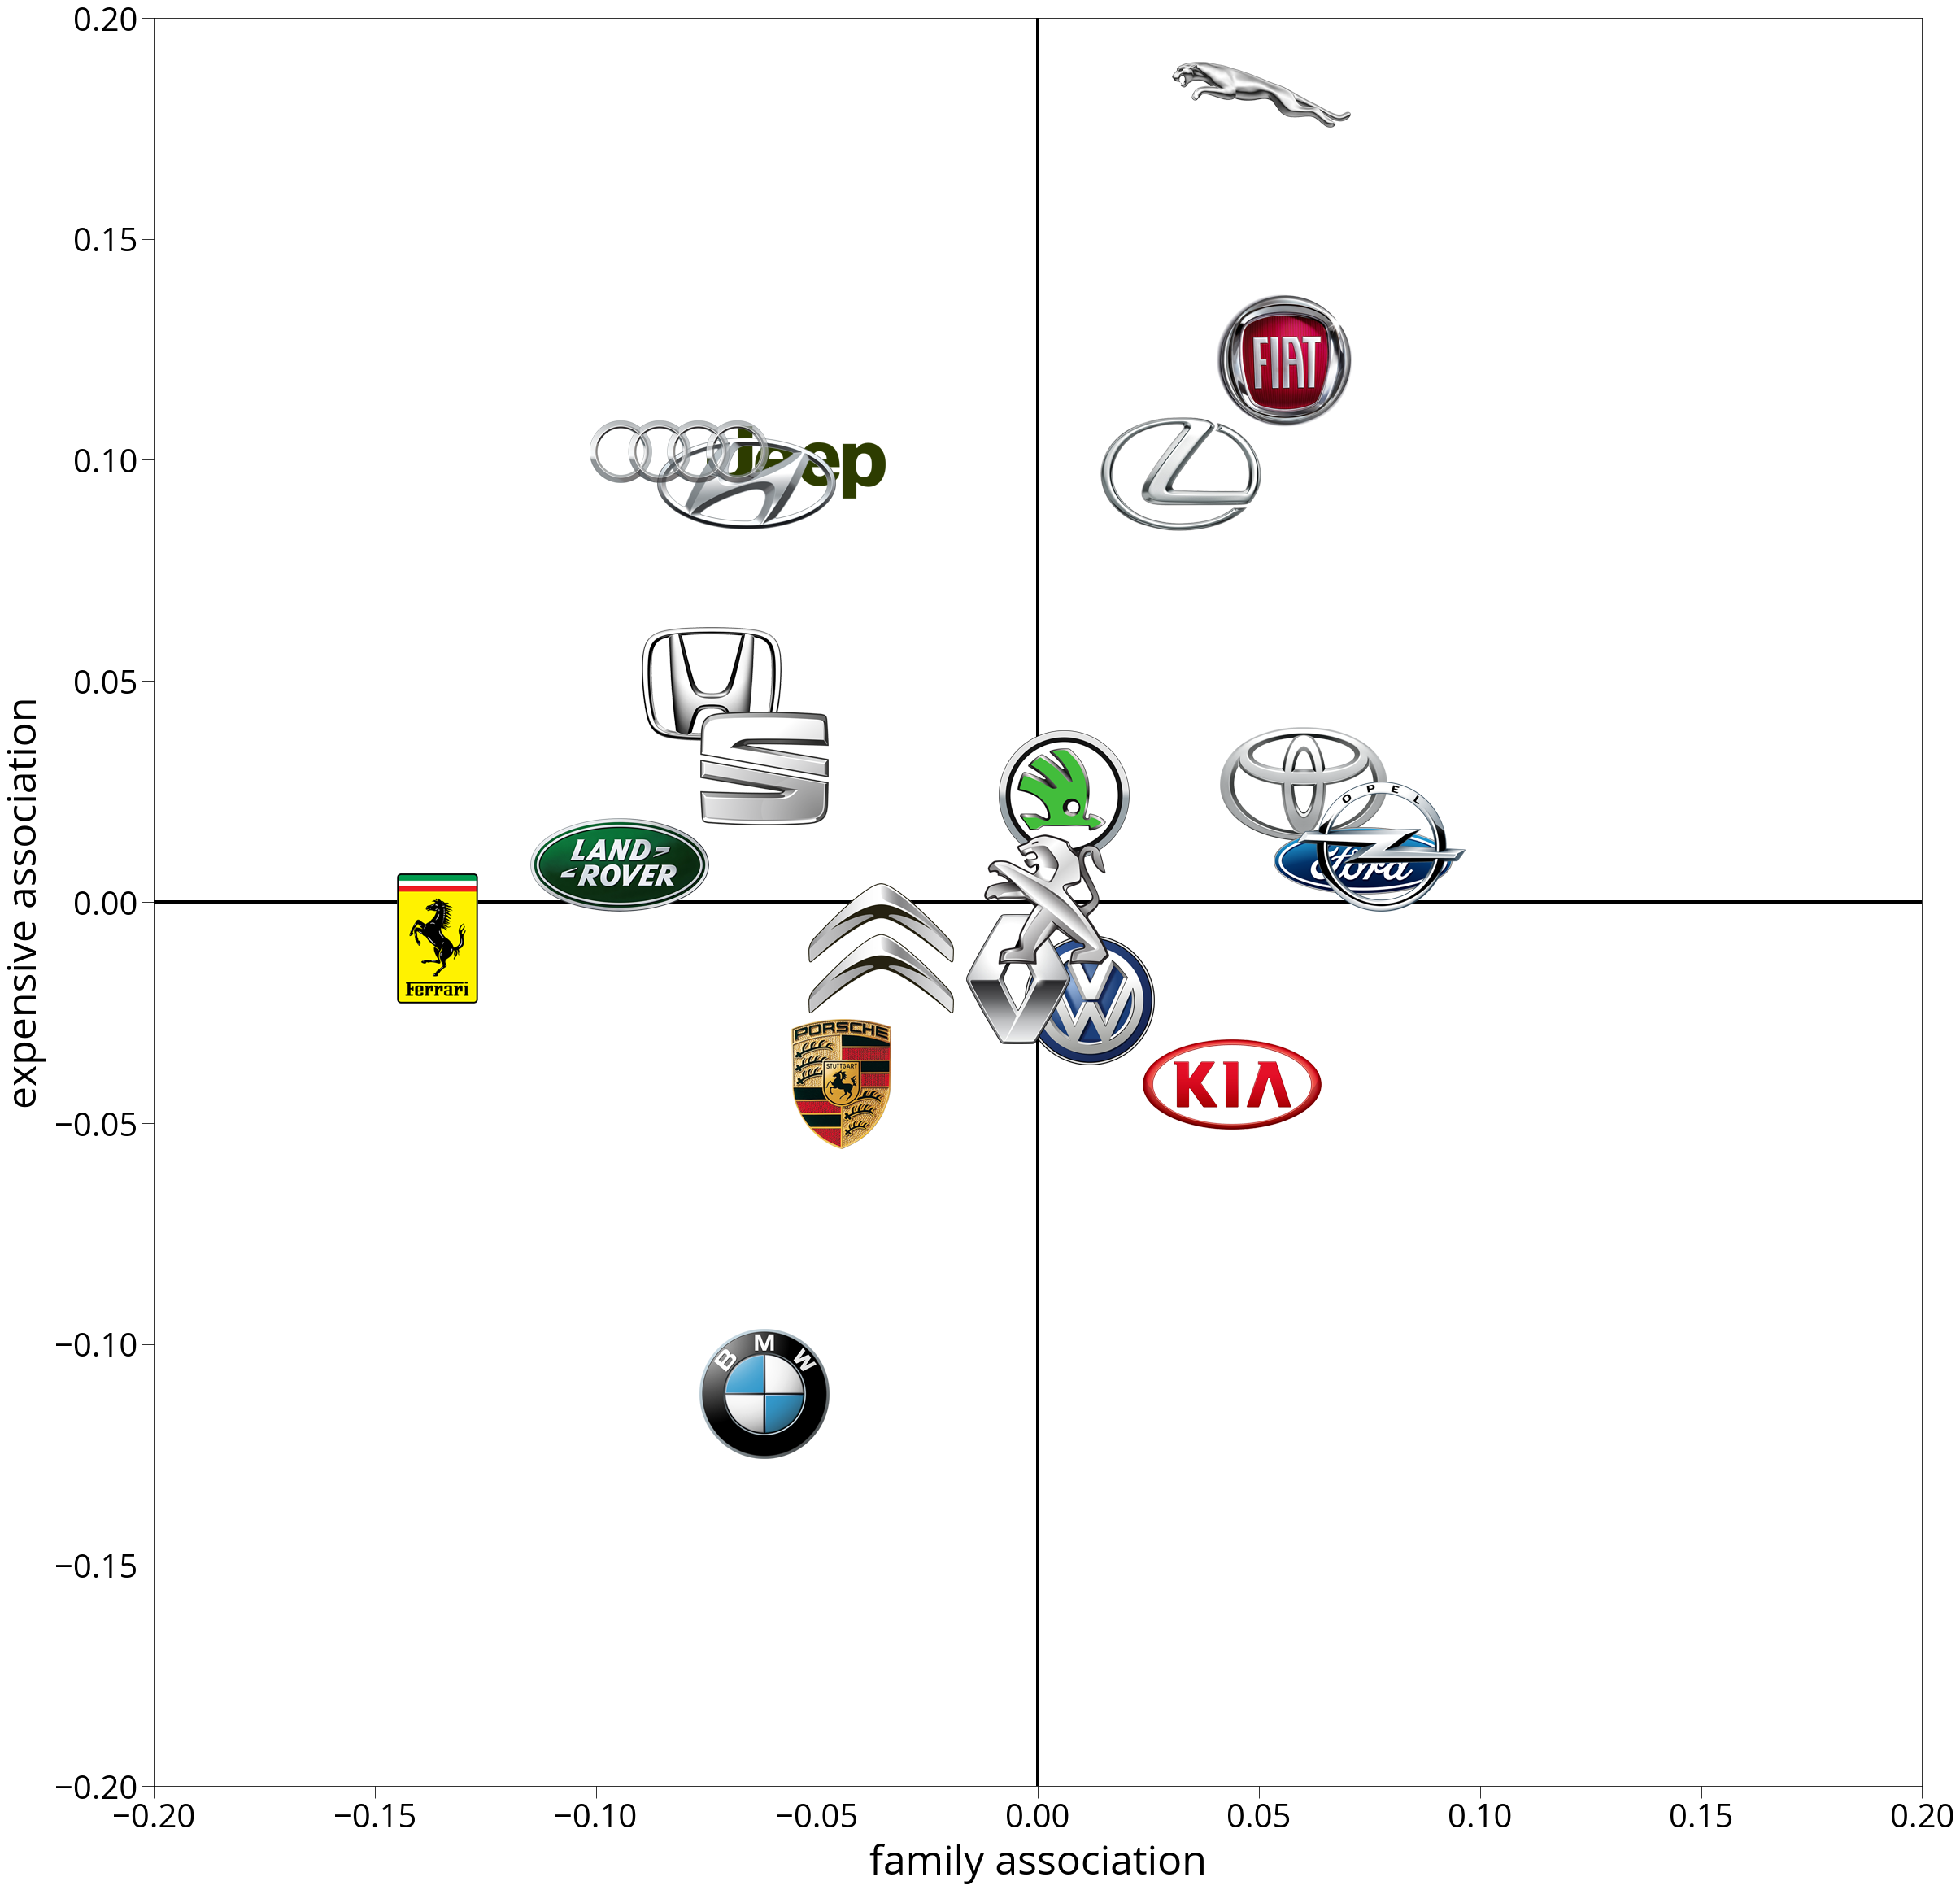

In [206]:
plot_words_map(col, 'family', 'expensive')

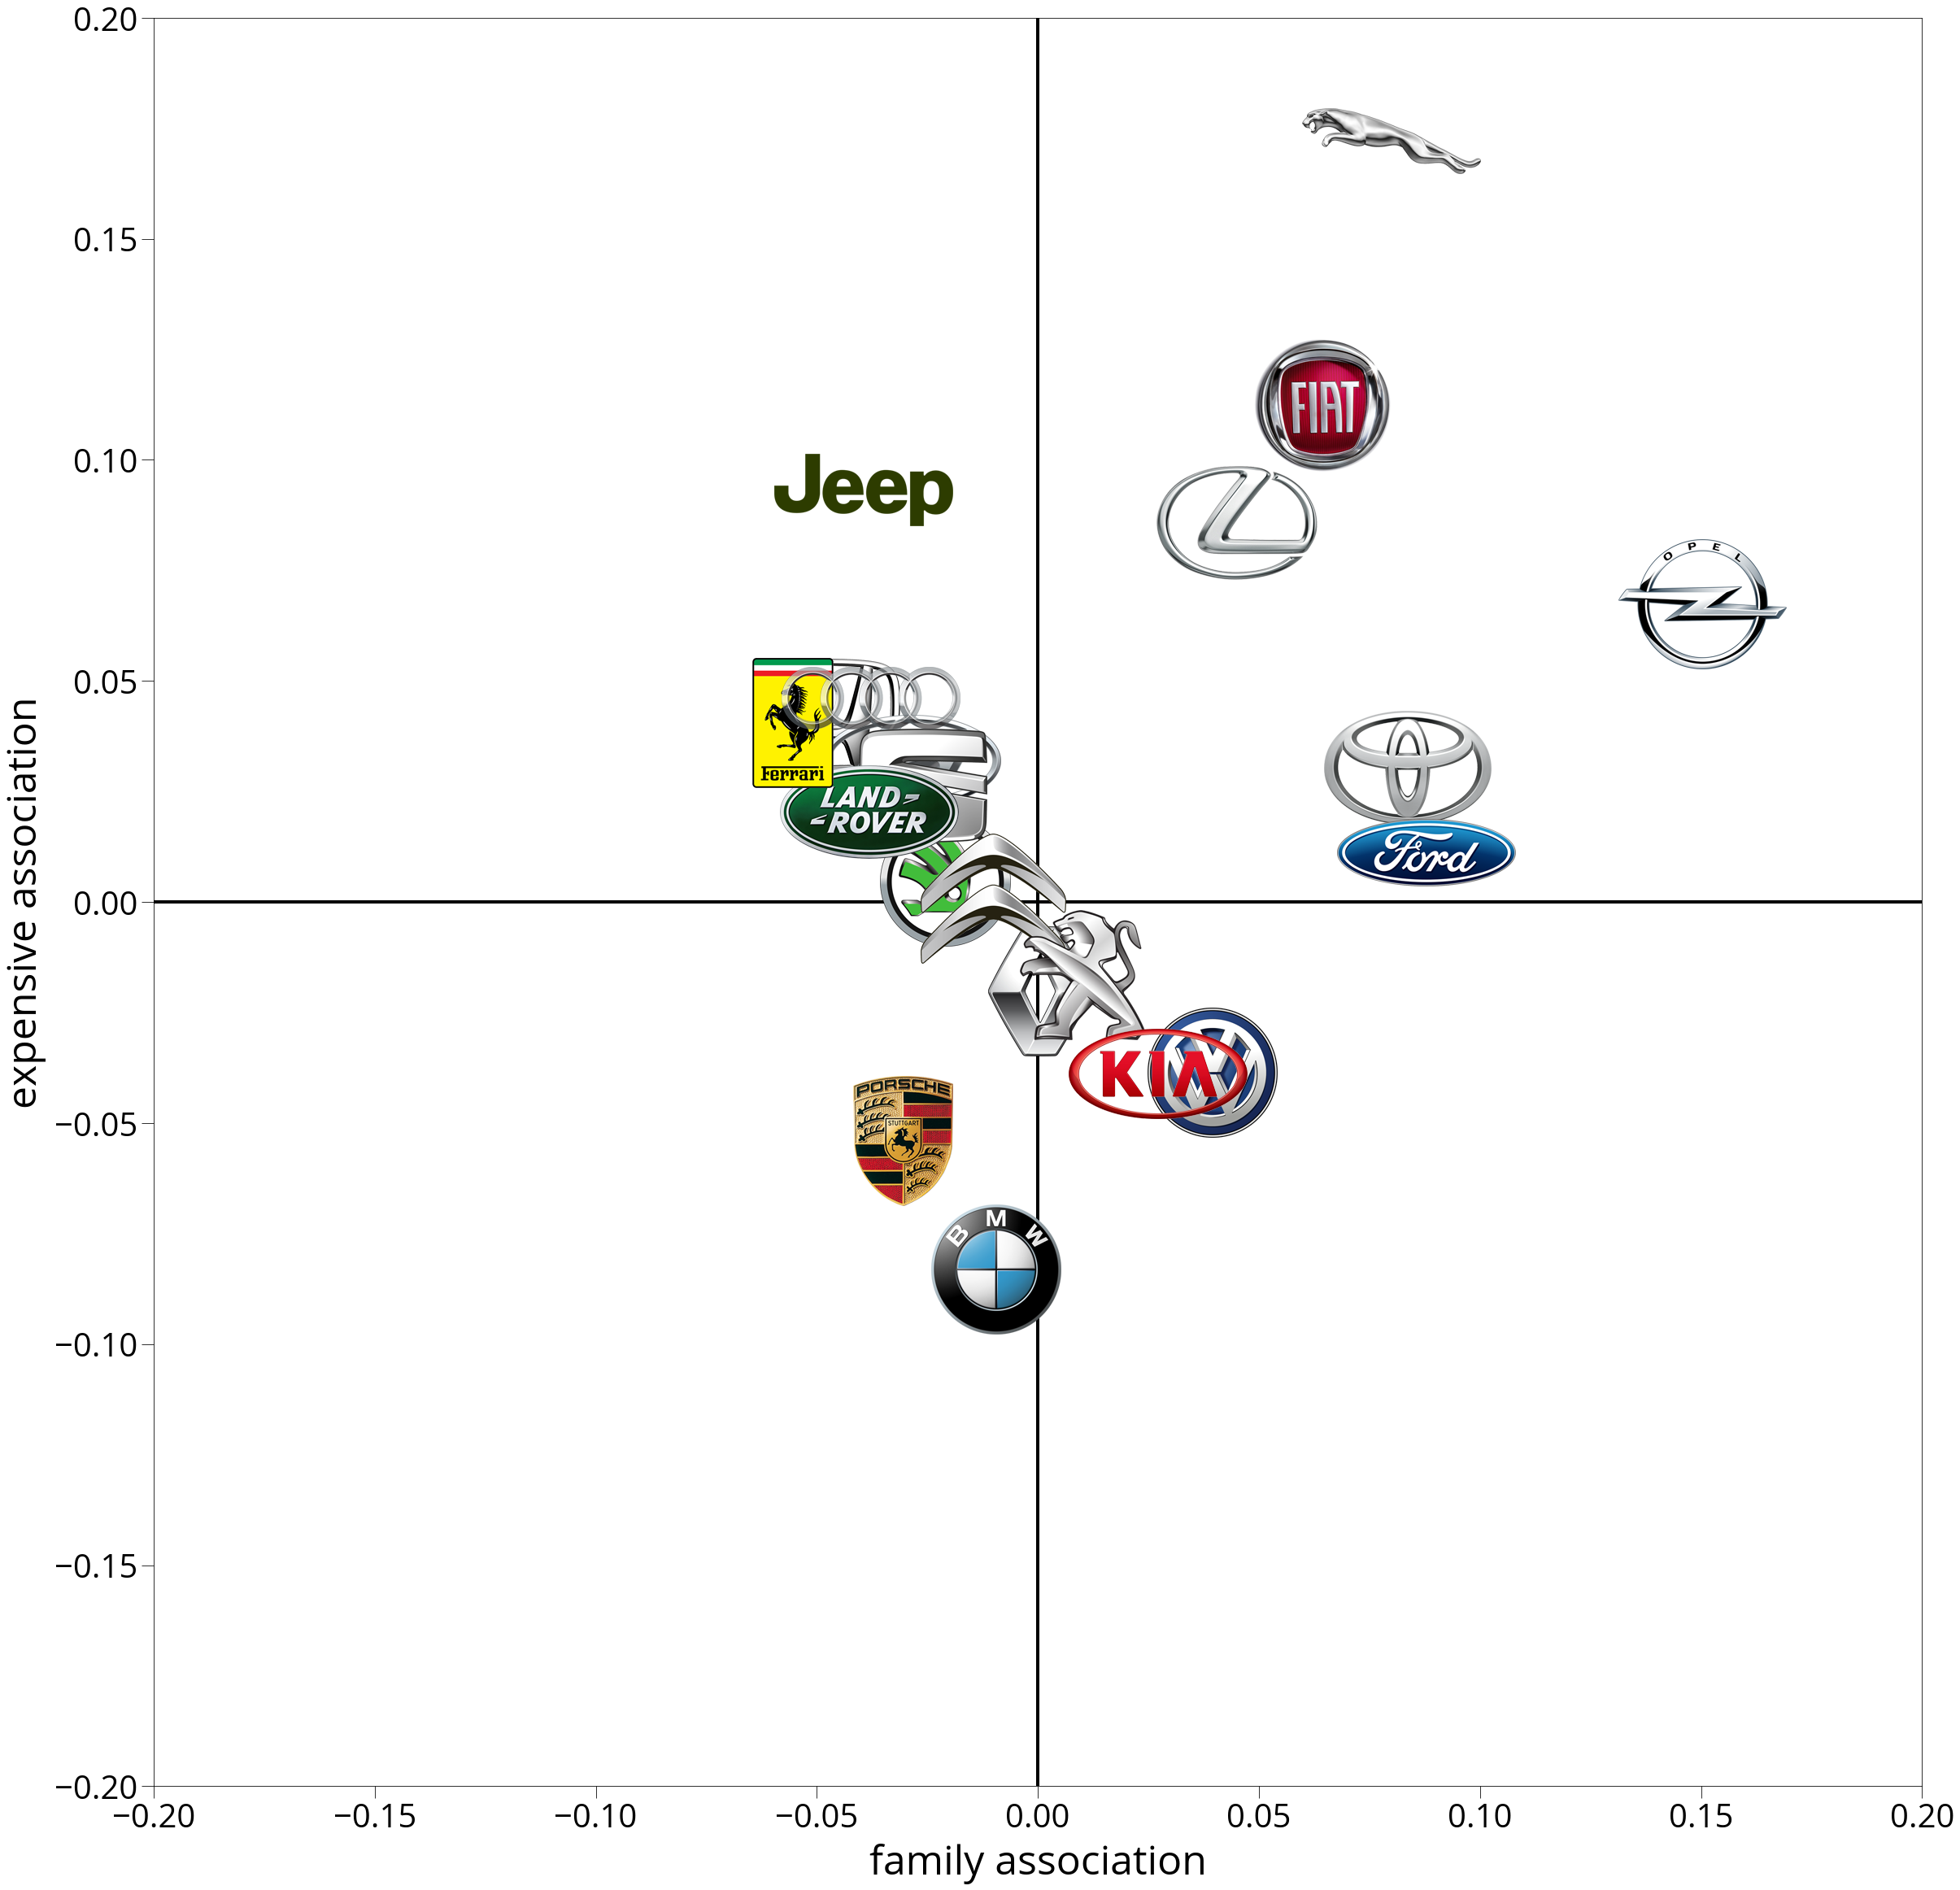

In [198]:
plot_words_map(col, 'family', 'expensive')